# 미니 프로젝트 : 가위바위보 분류기

In [4]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


데이터 불러오기 + Resize

In [5]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [6]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

419  images to be resized.
419  images resized.
가위 이미지 resize 완료!


In [7]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

398  images to be resized.
398  images resized.
바위 이미지 resize 완료!


In [8]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

398  images to be resized.
398  images resized.
보 이미지 resize 완료!


In [9]:
import numpy as np

def load_data(img_path, number_of_data=1215):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1215 입니다.
x_train shape: (1215, 28, 28, 3)
y_train shape: (1215,)


이미지 불러오기

라벨:  0


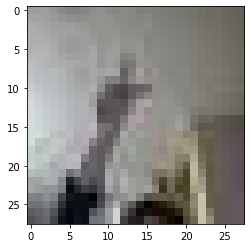

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [15]:
import tensorflow as tf
from tensorflow import keras

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20

model = keras.models.Sequential()

# 입력 크기와 레이어 수 조정
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

# 과적합 방지: 드롭아웃 추가
model.add(keras.layers.Dropout(0.3))

# 특성 벡터화 및 Fully Connected 레이어
model.add(keras.layers.GlobalAveragePooling2D())  # 더 효율적인 풀링
model.add(keras.layers.Dense(n_dense, activation='relu'))

# 출력 레이어: 가위, 바위, 보의 3개 클래스
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 구조 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

딥러닝 네트워크 학습시키기

In [16]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

import tensorflow as tf
from tensorflow import keras
import numpy as np

# 🧹 CIFAR-10 데이터 로드 및 필터링 (0, 1, 2 클래스만)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
mask_train = np.isin(y_train, [0, 1, 2])  # 0, 1, 2 클래스만 선택
x_train = x_train[mask_train.flatten()]  # 0, 1, 2에 해당하는 데이터만 선택
y_train = y_train[mask_train.flatten()]

mask_test = np.isin(y_test, [0, 1, 2])  # 0, 1, 2 클래스만 선택
x_test = x_test[mask_test.flatten()]  # 0, 1, 2에 해당하는 데이터만 선택
y_test = y_test[mask_test.flatten()]

# 🧹 **데이터 정규화**
x_train = x_train.astype('float32') / 255.0  # 0~1로 스케일링
x_test = x_test.astype('float32') / 255.0

# 🛠️ **모델 설계**
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))  # 가위, 바위, 보의 3개 클래스

# ⚙️ **모델 컴파일**
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 🚀 **모델 훈련**
history = model.fit(
    x_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(x_test, y_test), 
    verbose=1
)

Epoch 1/20
469/469 [==============================] - 28s 56ms/step - loss: 0.8112 - accuracy: 0.6429 - val_loss: 0.6314 - val_accuracy: 0.7390
Epoch 2/20
469/469 [==============================] - 26s 56ms/step - loss: 0.6385 - accuracy: 0.7333 - val_loss: 0.6125 - val_accuracy: 0.7413
Epoch 3/20
469/469 [==============================] - 26s 56ms/step - loss: 0.5769 - accuracy: 0.7626 - val_loss: 0.5161 - val_accuracy: 0.7907
Epoch 4/20
469/469 [==============================] - 26s 56ms/step - loss: 0.5328 - accuracy: 0.7841 - val_loss: 0.5083 - val_accuracy: 0.7927
Epoch 5/20
469/469 [==============================] - 26s 56ms/step - loss: 0.5108 - accuracy: 0.7951 - val_loss: 0.4695 - val_accuracy: 0.8093
Epoch 6/20
469/469 [==============================] - 26s 55ms/step - loss: 0.4919 - accuracy: 0.7996 - val_loss: 0.4450 - val_accuracy: 0.8253
Epoch 7/20
469/469 [==============================] - 26s 55ms/step - loss: 0.4751 - accuracy: 0.8082 - val_loss: 0.4409 - val_accuracy:

test accuracy 측정하기

In [17]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

import os
import numpy as np
from PIL import Image  # 이미지 파일을 불러오기 위해 PIL(Pillow) 라이브러리 사용

# 🧱 **1. 이미지 크기 조정 함수 (resize_images)**
def resize_images(image_dir_path, target_size=(28, 28)):  # 이미지를 (28, 28)로 리사이즈
    print(f"📁 '{image_dir_path}' 경로에 있는 이미지를 리사이즈합니다.")
    image_files = os.listdir(image_dir_path)  # 폴더에 있는 이미지 파일 목록
    total_files = len(image_files)
    print(f"총 이미지 파일 개수: {total_files}개")
    
    for i, file_name in enumerate(image_files):
        file_path = os.path.join(image_dir_path, file_name)  # 이미지 파일의 전체 경로
        try:
            img = Image.open(file_path)  # 이미지 열기
            img = img.resize(target_size)  # (28, 28)로 리사이즈
            img.save(file_path)  # 리사이즈한 이미지 저장
            if i % 10 == 0:  # 진행 상태 표시
                print(f"{i}/{total_files} 이미지 리사이즈 완료")
        except Exception as e:
            print(f"❌ 오류 발생: {file_path} - {e}")
            
    print(f"🎉 모든 이미지 리사이즈 완료 - 총 {total_files}개 파일 리사이즈됨.")


# 🧱 **2. 데이터 로드 함수 (load_data)**
def load_data(image_dir_path, target_size=(28, 28)):
    print(f"📥 데이터 로드 중... 경로: {image_dir_path}")
    x_data = []  # 이미지 데이터 (X)
    y_data = []  # 라벨 데이터 (Y)
    
    labels = {'scissor': 0, 'rock': 1, 'paper': 2}  # 가위, 바위, 보 라벨 설정
    
    for label_name, label_number in labels.items():
        label_dir = os.path.join(image_dir_path, label_name)  # 라벨 디렉토리
        if not os.path.exists(label_dir):
            print(f"📂 {label_dir} 디렉토리가 존재하지 않습니다. 건너뜁니다.")
            continue

        image_files = os.listdir(label_dir)  # 이미지 파일 목록
        print(f"📁 '{label_name}' 라벨의 이미지 개수: {len(image_files)}개")

        for file_name in image_files:
            file_path = os.path.join(label_dir, file_name)  # 이미지 파일 경로
            try:
                img = Image.open(file_path)  # 이미지 열기
                img = img.resize(target_size)  # (28, 28)로 리사이즈
                img = np.array(img)  # 이미지를 Numpy 배열로 변환
                x_data.append(img)  # x_data에 추가
                y_data.append(label_number)  # y_data에 라벨 추가
            except Exception as e:
                print(f"❌ 오류 발생: {file_path} - {e}")
    
    x_data = np.array(x_data)  # 리스트 → Numpy 배열 변환
    y_data = np.array(y_data)  # 리스트 → Numpy 배열 변환
    print(f"📏 데이터 로드 완료: x_data.shape={x_data.shape}, y_data.shape={y_data.shape}")
    return x_data, y_data


# 📘 **3. 데이터셋 경로 지정**
image_dir_path_scissor = os.path.join(os.getenv("HOME"), "aiffel/rock_scissor_paper/test/scissor")
image_dir_path_rock = os.path.join(os.getenv("HOME"), "aiffel/rock_scissor_paper/test/rock")
image_dir_path_paper = os.path.join(os.getenv("HOME"), "aiffel/rock_scissor_paper/test/paper")

# 📁 **4. 이미지 리사이즈 (scissor, rock, paper)**
resize_images(image_dir_path_scissor)  # 가위 이미지 리사이즈
resize_images(image_dir_path_rock)  # 바위 이미지 리사이즈
resize_images(image_dir_path_paper)  # 보 이미지 리사이즈


# 📘 **5. x_test, y_test 데이터 생성**
image_dir_path = os.path.join(os.getenv("HOME"), "aiffel/rock_scissor_paper/test")
x_test, y_test = load_data(image_dir_path)  # 이미지 불러오기

# 🔍 **6. 데이터 정규화**
x_test_norm = x_test / 255.0  # 0~1 사이의 값으로 정규화
print(f"📏 x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

📁 '/aiffel/aiffel/rock_scissor_paper/test/scissor' 경로에 있는 이미지를 리사이즈합니다.
총 이미지 파일 개수: 101개
0/101 이미지 리사이즈 완료
10/101 이미지 리사이즈 완료
20/101 이미지 리사이즈 완료
30/101 이미지 리사이즈 완료
40/101 이미지 리사이즈 완료
50/101 이미지 리사이즈 완료
60/101 이미지 리사이즈 완료
70/101 이미지 리사이즈 완료
80/101 이미지 리사이즈 완료
❌ 오류 발생: /aiffel/aiffel/rock_scissor_paper/test/scissor/scissor.zip - cannot identify image file '/aiffel/aiffel/rock_scissor_paper/test/scissor/scissor.zip'
100/101 이미지 리사이즈 완료
🎉 모든 이미지 리사이즈 완료 - 총 101개 파일 리사이즈됨.
📁 '/aiffel/aiffel/rock_scissor_paper/test/rock' 경로에 있는 이미지를 리사이즈합니다.
총 이미지 파일 개수: 101개
0/101 이미지 리사이즈 완료
10/101 이미지 리사이즈 완료
20/101 이미지 리사이즈 완료
❌ 오류 발생: /aiffel/aiffel/rock_scissor_paper/test/rock/rock.zip - cannot identify image file '/aiffel/aiffel/rock_scissor_paper/test/rock/rock.zip'
30/101 이미지 리사이즈 완료
40/101 이미지 리사이즈 완료
50/101 이미지 리사이즈 완료
60/101 이미지 리사이즈 완료
70/101 이미지 리사이즈 완료
80/101 이미지 리사이즈 완료
90/101 이미지 리사이즈 완료
100/101 이미지 리사이즈 완료
🎉 모든 이미지 리사이즈 완료 - 총 101개 파일 리사이즈됨.
📁 '/aiffel/aiffel/rock_scissor_paper/test/paper'

In [18]:
# 테스트 데이터로 모델 평가하기
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# 📢 **평가 결과 출력**
print("📉 test_loss: {:.4f}".format(test_loss))
print("📈 test_accuracy: {:.4f}".format(test_accuracy))

10/10 - 0s - loss: 173.4003 - accuracy: 0.3333
📉 test_loss: 173.4003
📈 test_accuracy: 0.3333
